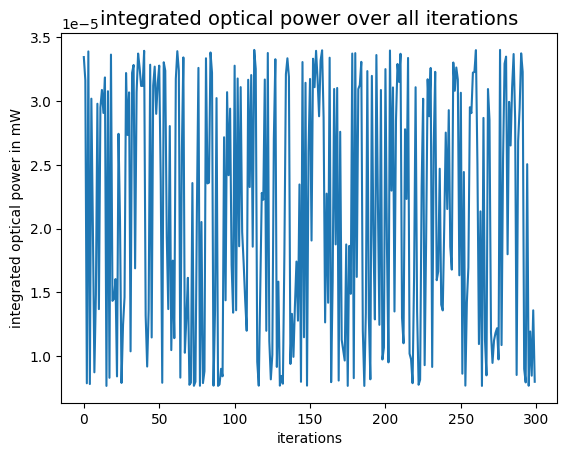

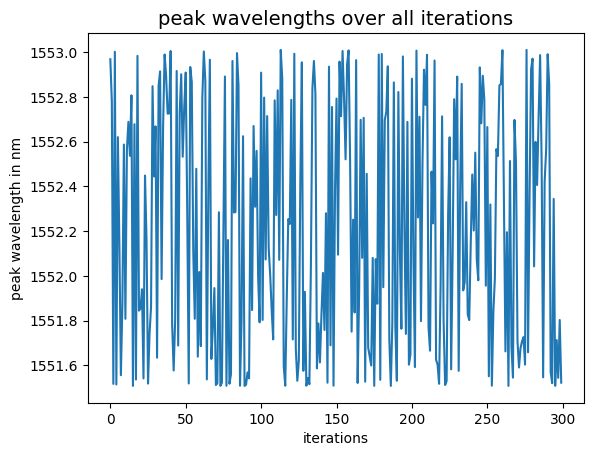

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import pandas as pd 

current_laserdiode = 0.08  #A
current_amplitude = 0.020  #A
current_frequency = 1
voltage_heater = 1         #V
voltage_amplitude = 0.050  #V
voltage_frequency = 1
iterations = 300
t = np.linspace(0, 10, 1000)
optical_power = np.empty(iterations)
peak_wavelength = np.empty(iterations)


def current_over_time(t, current_laserdiode, current_amplitude, current_frequency):
    return current_laserdiode + current_amplitude * np.sin(2 * np.pi * current_frequency * t)

def voltage_over_time(t, voltage_heater, voltage_amplitude, voltage_frequency):
    return voltage_heater + voltage_amplitude * np.sin(2 * np.pi * voltage_frequency * t)

def get_tck(csv_file, column1, column2, rows):
    df = pd.read_csv(csv_file, nrows = rows)              #erste 9 Datenpunkte
    df.columns = df.columns.str.strip()
    return splrep(df[column1], df[column2])  

def get_curr_volt():
    t_fix = np.random.uniform(0, 10)
    chosen_current = current_over_time(t_fix, current_laserdiode, current_amplitude, current_frequency) *1e3 #jetzt in mA
    chosen_voltage = voltage_over_time(t_fix, voltage_heater, voltage_amplitude, voltage_frequency) 
    return chosen_current, chosen_voltage  

def laseroutput(i, chosen_current, chosen_voltage):
    optical_power[i] = splev(chosen_current, tck_current_power)
    peak_wavelength[i] = splev(chosen_current, tck_current_wavelength) + splev(chosen_voltage, tck_voltage_shift)
    return optical_power[i], peak_wavelength[i]


#PROGRAMM

#current_power_data readout
tck_current_power = get_tck('current_power_data.csv', 'Current (mA)', 'Optical Power (mW)', 9)

#voltage_shift_data readout
tck_voltage_shift =  get_tck('voltage_shift_data.csv', 'Voltage (V)', 'Wavelength Shift (nm)', 20)

#current_wavelength_data readout:
tck_current_wavelength =  get_tck('current_wavelength_modified.csv', 'Current (mA)', 'Wavelength (nm)', 9)         #modified sodass mA Werte stimmen (/1000)

for i in range(iterations):
    #get chosen_current and chosen_voltage
    chosen_current, chosen_voltage = get_curr_volt()
    

    #get laseroutput
    optical_power[i], peak_wavelength[i] = laseroutput(i, chosen_current, chosen_voltage)

x = np.linspace(0,iterations-1, iterations) 
plt.plot(x, optical_power, label = 'optical power')  
plt.title('integrated optical power over all iterations',size = 14)
plt.xlabel('iterations')
plt.ylabel('integrated optical power in mW')
plt.show()
plt.plot(x, peak_wavelength, label = 'peak wavelength')
plt.title('peak wavelengths over all iterations',size = 14)
plt.xlabel('iterations')
plt.ylabel('peak wavelength in nm')

plt.show()
